<center>
<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
</center>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>
<center><b><h1>Meet Bagda - 102</b></center>    
<center><b><h1>22010101007</b></center>
<center><b><h1>Lab - 9</b></center>  
<center><b><h5>K-means, K-Medoids</b></center>   
<pre>

# Step 1: Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

g:\SOFTWARE_INSTALLTION\ANACONDA\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Step 2: Load the Dataset
Load Given dataset -  StudentsPerformance.csv

In [2]:
df = pd.read_csv('./StudentsPerformance.csv')

# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


# Step 4: Display PairPlot

g:\SOFTWARE_INSTALLTION\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
g:\SOFTWARE_INSTALLTION\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
g:\SOFTWARE_INSTALLTION\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
g:\SOFTWARE_INSTALLTION\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


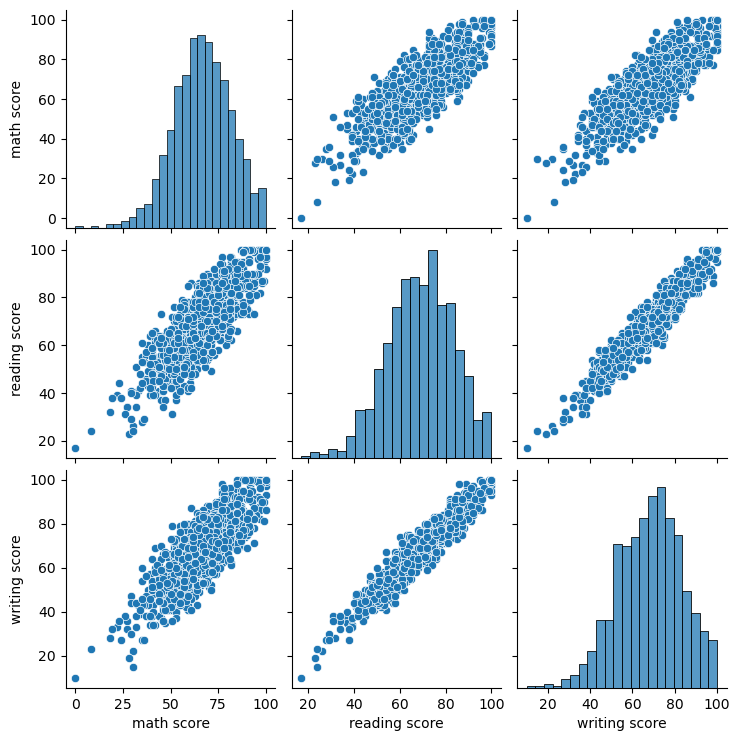

In [7]:
sns.pairplot(df)

# Step 5: Correlation heatmap

<Axes: >

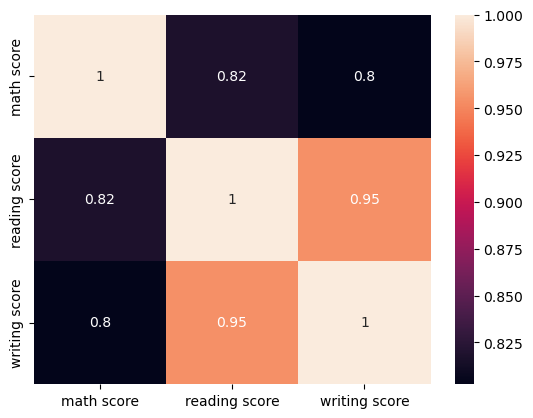

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Step 6: Distribution of numerical features

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

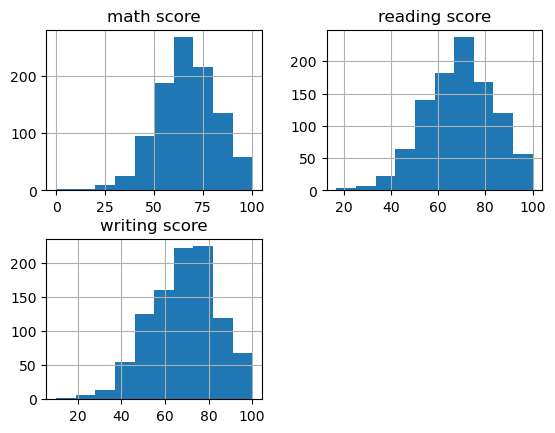

In [9]:
df.hist()

<Axes: >

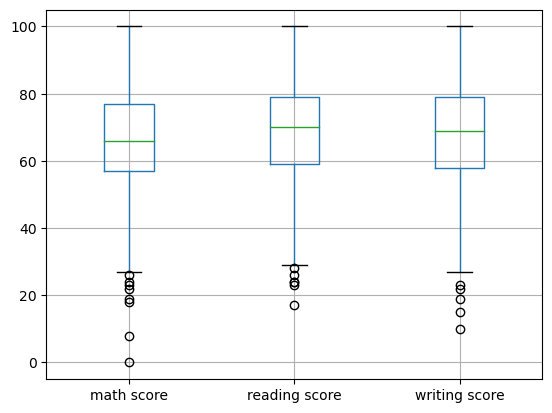

In [10]:
df.boxplot()

# Step 7: Apply StandardScaler

In [11]:
stdscal = StandardScaler()

In [12]:
x_transform = stdscal.fit_transform(df[['math score', 'reading score', 'writing score']])

In [13]:
x_transform

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

# Step 8: Elbow method to find optimal k

### What is an Elbow Point?

Think of it like this: When you're trying to group similar things together (clustering), you need to decide how many groups to make. The elbow point helps you make this decision in a smart way.

Imagine you're plotting a line on a graph that shows how well your grouping works:

At first, adding more groups makes things much better (the line drops steeply)
But at some point, adding more groups only gives tiny improvements (the line flattens out)
The "elbow point" is where this change happens - it looks like an elbow on your graph! This point tells you the ideal number of groups to use. After this point, creating more groups doesn't help much and might just make things unnecessarily complicated.

In [28]:
distances = []
for k in range(1, 11):
    km = KMeans(n_clusters=k,random_state=42)
    km = km.fit(x_transform)
    distances.append(km.inertia_)

distances

[3000.000000000001,
 1253.857114450882,
 788.3656838915334,
 604.9240060963618,
 494.93117746347906,
 444.7596671831983,
 385.63998703400836,
 346.8632673863846,
 314.79260371810824,
 300.9322778661916]

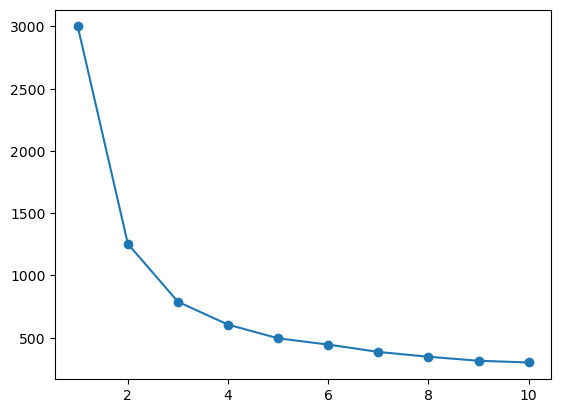

In [29]:
plt.plot(range(1, 11), distances, marker='o')

# Step 9:Based on the elbow plot, choose an appropriate k value (e.g., k=3)

In [14]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters=3, random_state=42)

In [16]:
model.fit(x_transform)

KMeans(n_clusters=3, random_state=42)

# Step 10: Print Cluster Center

In [17]:
model.cluster_centers_

array([[-0.04951336, -0.04870596, -0.01529686],
       [-1.18720058, -1.26762535, -1.28838441],
       [ 1.03099793,  1.09485536,  1.06358515]])

In [32]:
df['KMeans'] = model.labels_
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,KMeans
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,2
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,2
996,male,group C,high school,free/reduced,none,62,55,55,1
997,female,group C,high school,free/reduced,completed,59,71,65,0
998,female,group D,some college,standard,completed,68,78,77,0


# Step 11: Plot Cluster

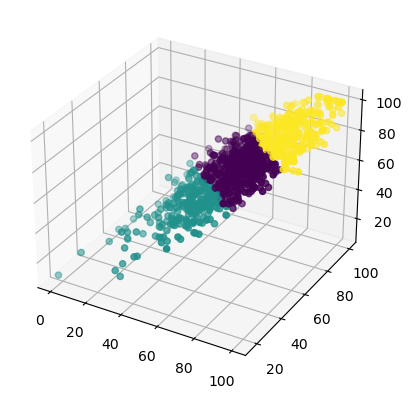

In [33]:
ax = plt.axes(projection='3d')

ax.scatter3D(df['math score'], df['reading score'], df['writing score'], c=df['KMeans'])

# Step 12:Analyze clusters 

In [38]:
df['total'] = df['math score'] + df['reading score'] + df['writing score']

In [43]:
df[df['KMeans'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
math score,443.0,65.338600,7.511260,42.0,60.0,65.0,70.0,85.0
reading score,443.0,68.458239,6.071217,51.0,64.0,68.0,73.0,85.0
writing score,443.0,67.821670,6.518493,50.0,63.0,68.0,73.0,82.0
KMeans,443.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
total,443.0,201.618510,14.531642,175.0,190.5,203.0,214.0,226.0


In [39]:
gdf = df.groupby('KMeans')

In [44]:
for index, cluster_data in gdf:
    print(f'Cluster {index}')
    print(cluster_data['total'].min(), cluster_data['total'].max())
    # print(cluster_data['total'].mean()) # using mean of total score we can also classify the best students
    print("----"*3)

Cluster 0
175 226
------------
Cluster 1
27 175
------------
Cluster 2
226 300
------------


# Step 13: Perform K-Medoids

In [46]:
# Install the scikit-learn-extra package
# %pip install scikit-learn-extra

from sklearn_extra.cluster import KMedoids

In [51]:
model_kmedoid = KMedoids(n_clusters=3, random_state=42)

In [55]:
kmedoids_labels = model_kmedoid.fit(x_transform)

In [53]:
x_transform[model_kmedoid.medoid_indices_]

array([[-0.00587246,  0.19399858,  0.12812699],
       [-0.99561237, -0.90242577, -0.99117351],
       [ 0.9178848 ,  1.08484337,  1.11574507]])

In [54]:
model_kmedoid.labels_

array([0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0,
       0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1,
       2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1,
       0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1,
       1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1,
       0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2,
       2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2,

In [59]:
# this algo is less affect by outliers because there is no centroid in kmedoids

# Step:14 Comparison of K-means and K-medoids Clusters

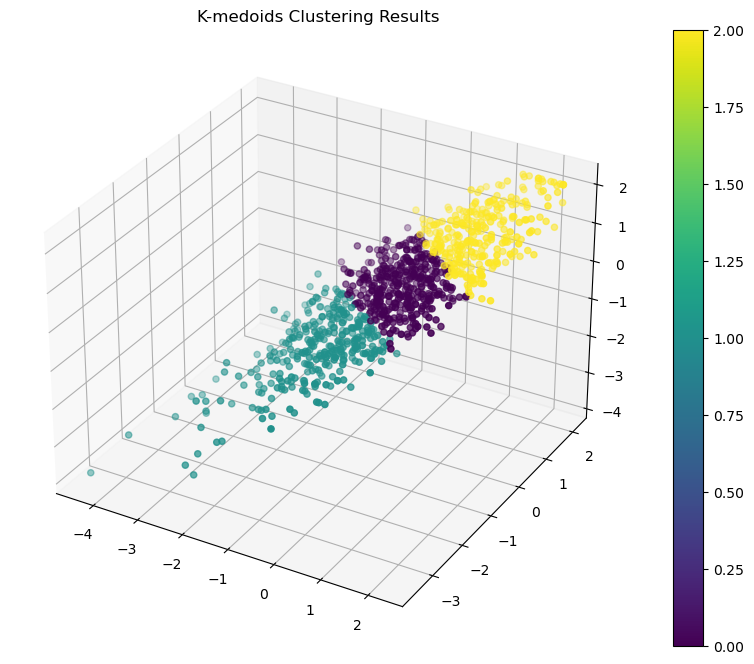


Cluster 0 Statistics:
--------------------
Size: 396

Score Statistics:
       math score  reading score  writing score
count  396.000000     396.000000     396.000000
mean    66.868687      70.545455      69.777778
std      7.175057       5.461066       5.748846
min     45.000000      56.000000      57.000000
25%     62.000000      66.000000      66.000000
50%     67.000000      71.000000      70.000000
75%     72.000000      74.000000      74.000000
max     86.000000      85.000000      82.000000

Total Score Range:
Min: 184, Max: 229

Cluster 1 Statistics:
--------------------
Size: 320

Score Statistics:
       math score  reading score  writing score
count  320.000000     320.000000     320.000000
mean    50.590625      52.806250      50.965625
std     10.696053       8.681763       9.220160
min      0.000000      17.000000      10.000000
25%     45.000000      48.750000      46.000000
50%     52.000000      54.500000      52.000000
75%     58.000000      59.000000      57.000000

In [61]:
# Initialize and fit K-medoids model
model_kmedoid = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = model_kmedoid.fit_predict(x_transform)

# Add labels to dataframe
df['KMedoids'] = kmedoids_labels

# 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_transform[:, 0], 
                    x_transform[:, 1], 
                    x_transform[:, 2],
                    c=kmedoids_labels,
                    cmap='viridis')
plt.title('K-medoids Clustering Results')
plt.colorbar(scatter)
plt.show()

# Analyze clusters
medoids_groups = df.groupby('KMedoids')

# Print cluster statistics
for cluster_id, cluster_data in medoids_groups:
    print(f"\nCluster {cluster_id} Statistics:")
    print("-" * 20)
    print(f"Size: {len(cluster_data)}")
    print("\nScore Statistics:")
    print(cluster_data[['math score', 'reading score', 'writing score']].describe())
    print("\nTotal Score Range:")
    print(f"Min: {cluster_data['total'].min()}, Max: {cluster_data['total'].max()}")

In [62]:
# Compare 
comparison_df = pd.DataFrame({
    'KMeans': df['KMeans'],
    'KMedoids': df['KMedoids']
})

print("Cluster Distribution Comparison:")
print("\nK-means distribution:")
print(comparison_df['KMeans'].value_counts())

Cluster Distribution Comparison:

K-means distribution:
KMeans
0    443
2    308
1    249
Name: count, dtype: int64


# Step: 15 Implement K- Means without Library
# Sample data points
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]

In [79]:
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]

In [83]:
def euc_dis(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

In [84]:
k = 3
clusters = {}
for i in range(k):
    clusters[i] = []

In [ ]:
import random, numpy as np

def k_means(k, data):
    center_data = [data[np.random.randint(0, len(data))] for i in range(0,k)]
    print(center_data)

    cluster_data = [[] for i in range(0,k)]
    for i in range (0, k):
        cluster_data[i] = [center_data[i]]
        print(cluster_data)

    for j in range(0,1):
        cluster_data = [[] for i in range(0,k)]
        for d in data:
            min_dis = 
    


In [ ]:
k_means(3, data)